In [166]:
import json
import sys
import logging 
import matplotlib.pyplot as plt
from collections import defaultdict
import scienceplots
import matplotlib as mpl
import numpy as np
import pandas as pd

#mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science'])
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

mpl.rc('font', **font)

In [173]:
results = json.load(open('flow-spark-svm-to-all-regression_vs_classfication.json'))
# results.pop("train"),results.pop("test")
results_dict = defaultdict(
    lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
)
# metric test/train nsdi/all
times = sorted(list(map(int, results.keys())))
metrics = set()
for time in times:
    for setup, setup_result in results[str(time)].items():
        for valid, valid_result in setup_result.items():
            for metric, metric_result in valid_result.items():
                whos, ptype = setup.split('_')
                results_dict[ptype][metric][whos][valid].append(
                    metric_result
                )



/tmp/ipykernel_1617399/3919624560.py:37: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = axc.legend(handles, ncol=2, loc=(-0.2, -0.5), labels=labels, frameon=True)


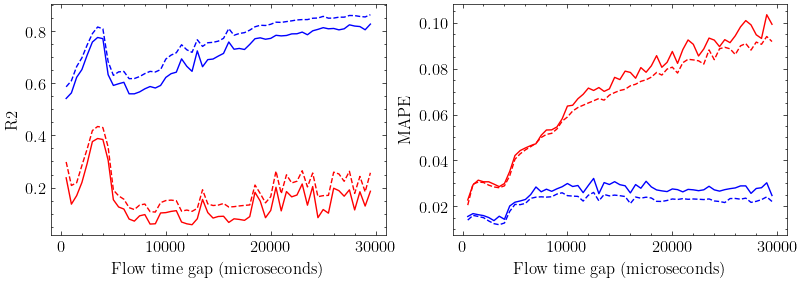

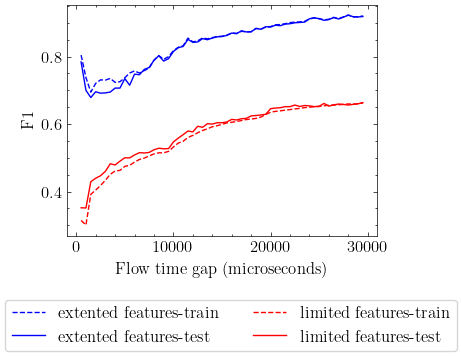

In [170]:
results_dict = dict(results_dict)
c = 0
fig, axs = plt.subplots(1, 2, figsize=(9.5, 3))
figc, axc = plt.subplots(1, 1, figsize=(4, 3))

for ptype in results_dict:
    for metric in results_dict[ptype]:
        if metric in ["mae", "smape", "accuracy", "mse"]:
            continue
        
        nsdi_test = results_dict[ptype][metric]['nsdi']['test']
        nsdi_train = results_dict[ptype][metric]['nsdi']['train']
        full_test = results_dict[ptype][metric]['all']['test']
        full_train = results_dict[ptype][metric]['all']['train']

        if ptype != "classifier":
            axs[c].set_ylabel(metric.upper())
            axs[c].set_xlabel("Flow time gap (microseconds)")
            l1 = axs[c].plot(times, full_train, 'b--', label='full feture set train score')
            l2 = axs[c].plot(times, full_test, 'b-', label='full feture set test score')
            l3 = axs[c].plot(times, nsdi_train, 'r--', label='limited feature set train score')
            l4 = axs[c].plot(times, nsdi_test, 'r-', label='limited feature set test score')
        elif ptype == "classifier":
            axc.set_ylabel(metric.upper())
            axc.set_xlabel("Flow time gap (microseconds)")
            l1 = axc.plot(times, full_train, 'b--', label='extented features-train')
            l2 = axc.plot(times, full_test, 'b-', label='extented features-test')
            l3 = axc.plot(times, nsdi_train, 'r--', label='limited features-train')
            l4 = axc.plot(times, nsdi_test, 'r-', label='limited features-test')
        c += 1

labels = ['extented features-train', 'extented features-test', 'limited features-train', 'limited features-test']

handles = [l1, l2, l3, l4]
# lgd = axs[0].legend(handles, ncol=2, loc=(0.45, -0.45), labels=labels, frameon=True)
fig.savefig("svm-nomse-nolegend.pdf", bbox_inches='tight',  dpi=500)# bbox_extra_artists=[lgd],
lgd = axc.legend(handles, ncol=2, loc=(-0.2, -0.5), labels=labels, frameon=True)
figc.savefig("pagerankc.pdf", bbox_inches='tight', bbox_extra_artists=[lgd], dpi=300)

/tmp/ipykernel_1617399/1164000745.py:54: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = axs[0].legend(handles, ncol=4, loc=(0.9, -0.3), labels=labels, frameon=True)
/tmp/ipykernel_1617399/1164000745.py:54: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = axs[0].legend(handles, ncol=4, loc=(0.9, -0.3), labels=labels, frameon=True)


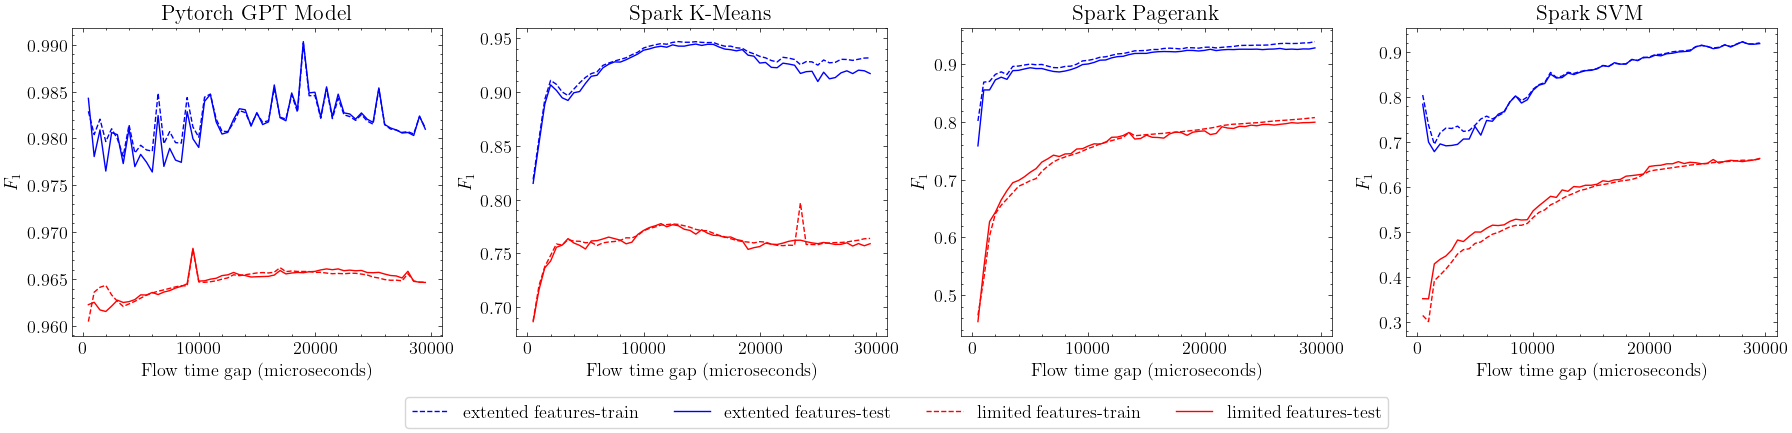

In [123]:
files = [
    "flow-pytorch-mingpt-node-0-to-all-3node-ported.json",
    "flow-spark-kmeans-primary-to-all-2.json",
    "flow-spark-pagerank-primary-to-all.json",
    "flow-spark-svm-primary-to-all.json"
]
titles = ["Pytorch GPT Model", "Spark K-Means", "Spark Pagerank", "Spark SVM"]
fig, axs = plt.subplots(1, 4, figsize=(22, 4))
c = 0
for f in files:
    results = json.load(open(f))
    if "train" in results:
        results.pop("train"),results.pop("test")
    results_dict = defaultdict(
        lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
    )
    # metric test/train nsdi/all
    times = sorted(list(map(int, results.keys())))
    metrics = set()
    for time in times:
        for setup, setup_result in results[str(time)].items():
            for valid, valid_result in setup_result.items():
                for metric, metric_result in valid_result.items():
                    whos, ptype = setup.split('_')
                    results_dict[ptype][metric][whos][valid].append(
                        metric_result
                    )
    results_dict = dict(results_dict)
  
    

    for metric in results_dict['classifier']:
        if metric in ["mae", "smape", "accuracy", "mse"]:
            continue

        nsdi_test = results_dict['classifier'][metric]['nsdi']['test']
        nsdi_train = results_dict['classifier'][metric]['nsdi']['train']
        full_test = results_dict['classifier'][metric]['all']['test']
        full_train = results_dict['classifier'][metric]['all']['train']
        if metric == "f1":
            metric = "$f_1$"
        axs[c].set_ylabel(metric.upper())
        axs[c].set_xlabel("Flow time gap (microseconds)")
        axs[c].set_title(titles[c])
        l1 = axs[c].plot(times, full_train, 'b--', label='full feture set train score')
        l2 = axs[c].plot(times, full_test, 'b-', label='full feture set test score')
        l3 = axs[c].plot(times, nsdi_train, 'r--', label='limited feature set train score')
        l4 = axs[c].plot(times, nsdi_test, 'r-', label='limited feature set test score')
    c += 1

    labels = ['extented features-train', 'extented features-test', 'limited features-train', 'limited features-test']

    handles = [l1, l2, l3, l4]
    lgd = axs[0].legend(handles, ncol=4, loc=(0.9, -0.3), labels=labels, frameon=True)
    fig.savefig("class.pdf", bbox_inches='tight', bbox_extra_artists=[lgd], dpi=500)
#     lgd = axc.legend(handles, ncol=2, loc=(-0.2, -0.5), labels=labels, frameon=True)
#     figc.savefig("pagerankc.pdf", bbox_inches='tight', bbox_extra_artists=[lgd], dpi=300)


/tmp/ipykernel_1617399/1081999331.py:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = axc.legend(handles, ncol=1, loc=(1.05, 0.4), labels=labels, frameon=True, fontsize=10)


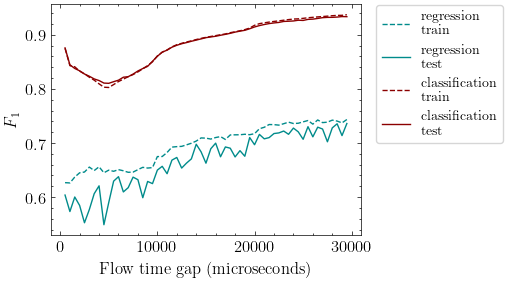

In [186]:
results_dict = dict(results_dict)
figc, axc = plt.subplots(1, 1, figsize=(4, 3))
handles = []
for ptype in results_dict:
        
    full_test = results_dict[ptype]['f1']['all']['test']
    full_train = results_dict[ptype]['f1']['all']['train']
    
    if ptype == "classifier":
        axc.set_ylabel("$F_1$")
        axc.set_xlabel("Flow time gap (microseconds)")
        l1 = axc.plot(times, full_train, 'darkred', label='classification train score', linestyle='--')
        l2 = axc.plot(times, full_test, 'darkred', label='classification test score')
    if ptype == "regclassifier":
        axc.set_ylabel("$F_1$")
        axc.set_xlabel("Flow time gap (microseconds)")
        l1 = axc.plot(times, full_train, 'darkcyan', label='regression train score', linestyle='--')
        l2 = axc.plot(times, full_test, color='darkcyan', label='regression test score')
    handles.append(l1)
    handles.append(l2)

labels = ['regression\n train', 'regression\n test', 'classification\n train', 'classification\n test']

lgd = axc.legend(handles, ncol=1, loc=(1.05, 0.4), labels=labels, frameon=True, fontsize=10)
figc.savefig("svmrc-2.pdf", bbox_inches='tight', bbox_extra_artists=[lgd], dpi=300)


In [58]:
flows = {}
x = list(range(500, 30000, 500))
p = "files/"
for td in x:
    path = f"{p}/{td}/full.csv"
    flows[td] = pd.read_csv(path)

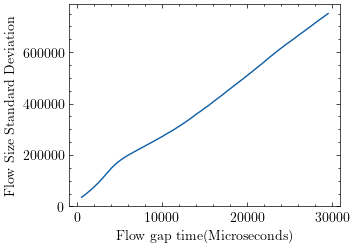

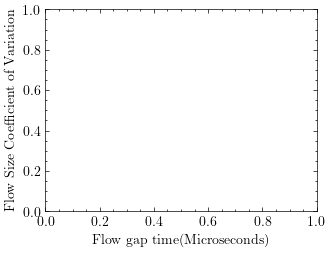

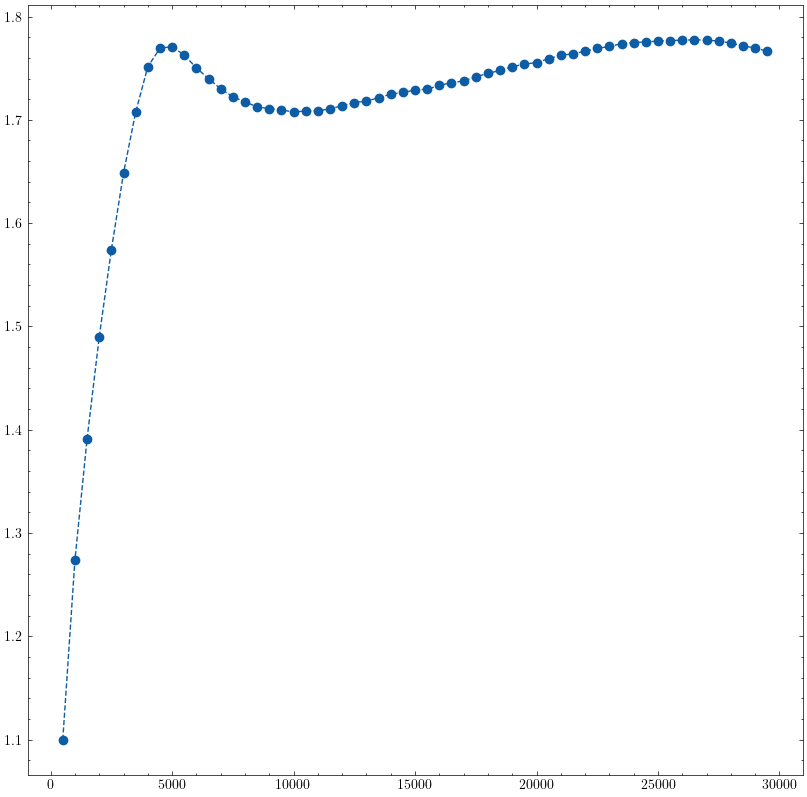

In [78]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import EntropyHub as EH

# y = []
# for td in x:
#     flow_sizes = flows[td]['size'].values
#     s2 = len(flow_sizes)//2
#     flow_sizes = flow_sizes[s2:s2+10000]
#     # flow_sizes = (flow_sizes - np.mean(flow_sizes)) / np.std(flow_sizes)
#     app_en = EH.ApEn(flow_sizes, m=2)[0][-1]
#     y.append(app_en)
# plt.xlabel('Flow gap time(Microseconds)')
# plt.ylabel('Approximate Entropy')
# plt.plot(x, y)
# plt.show()

# y = []
# RATIO = 15000
# for td in x:
#     flow_sizes = flows[td]['size'].values
#     elephant_ratio = ((flow_sizes > RATIO)*1).sum() / len(flow_sizes)
#     elephant_ratio = elephant_ratio
#     y.append(elephant_ratio)
# plt.xlabel('Flow gap time(Microseconds)')
# plt.ylabel('Total elephant flow ratio')
# plt.plot(x, y)
# plt.savefig("svm_elephant_ratio.pdf", dpi=300)

# y = []
# for td in x:
#     path = f"{p}/{td}/full.csv"
#     flow_sizes = flows[td]['size']
#     var = flow_sizes.var()
#     y.append(var)
# plt.xlabel('Flow gap time(Microseconds)')
# plt.ylabel('Variance')
# plt.plot(x, y)
# plt.show()

y = []
for td in x:
    flow_sizes = flows[td]['size'].iloc[:int(-0.3 * len(flows[td]))]
    var = flow_sizes.std()
    y.append(var)
plt.xlabel('Flow gap time(Microseconds)')
plt.ylabel('Flow Size Standard Deviation')
plt.plot(x, y)
plt.show()
#plt.savefig("pytorch_flowsize_std.pdf", dpi=300)

# y = []
# for td in x:
#     flowst = flows[td][flows[td]['gap'] >= 0]
#     flow_gaps = flowst['gap']
#     var = flow_gaps.var()
#     y.append(var)
# plt.xlabel('Flow gap time(Microseconds)')
# plt.ylabel('Flow gap Variance')
# plt.plot(x, y)
# plt.show()

# y = []
# for td in x:
#     flowst = flows[td][flows[td]['gap'] >= 0]
#     flowst = (flowst - flowst.mean()) / flowst.std()
#     Q1 = flowst.quantile(0.25)
#     Q3 = flowst.quantile(0.75)
#     IQR = Q3 - Q1
#     out = ((flowst < (Q1 - 1.5 * IQR)) | (flowst > (Q3 + 1.5 * IQR))).sum()['size'] / (len(flowst))
#     y.append(out)
# plt.xlabel('Flow gap time(Microseconds)')
# plt.ylabel('Flow Size Outliers Ratio')
# plt.plot(x, y)
# plt.show()

# y = []
# for td in x:
#     flow_sizes = flows[td]['size']
#     var = flow_sizes.iloc[:int(-0.3 * len(flows[td]))].mean()
#     y.append(var)
# plt.xlabel('Flow gap time')
# plt.ylabel('Flow size mean')
# plt.plot(x, y)
# plt.show()

# y = []
# for td in x:
#     flow_sizes = flows[td]['size']
#     no = len(flow_sizes)
#     y.append(no)
# plt.xlabel('Flow gap time(Microseconds)')
# plt.ylabel('Flow count')
# plt.plot(x, y)
# plt.show()


# y = []
# for td in x:
#     flow_sizes = flows[td]['size']
#     no = len(flow_sizes)
#     y.append(no)
# y = np.array(y)
# y = np.diff(y)
# plt.xlabel('Flow gap time(Microseconds)')
# plt.ylabel('Flow count diff')
# plt.plot(np.array(x)[1:], -y)
# plt.show()


y = []
for td in x:
    flow_sizes = flows[td]['size']
    v = flow_sizes.std() / flow_sizes.mean()
    y.append(v)
plt.xlabel('Flow gap time(Microseconds)')
plt.ylabel('Flow Size Coefficient of Variation')
plt.figure(figsize=(10, 10))
plt.plot(x, y, 'o--')
plt.savefig("pytorch_cv.jpg", dpi=300)
plt.show()

# y = []
# for td in x:
#     flow_sizes = flows[td]['size']
#     v = flow_sizes.autocorr(lag=1)
#     y.append(v)
# plt.xlabel('Flow gap time(Microseconds)')
# plt.ylabel('AutoCorrelation')
# plt.figure(figsize=(10, 10))
# plt.plot(x, y, 'o--')
# plt.show()

# y = []
# for td in x:
#     flow_sizes = flows[td]['size']
#     v = flow_sizes.autocorr(lag=2)
#     y.append(v)
# plt.xlabel('Flow gap time(Microseconds)')
# plt.ylabel('AutoCorrelation')
# plt.plot(x, y)
# plt.show()
# y = []
# for td in x:
#     flow_sizes = flows[td]['size']
#     v = flow_sizes.autocorr(lag=3)
#     y.append(v)
# plt.xlabel('Flow gap time(Microseconds)')
# plt.ylabel('AutoCorrelation')
# plt.plot(x, y)
#plt.show()

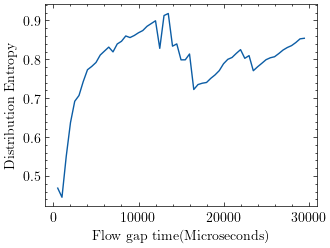

In [69]:
y = []
for td in x:
    flow_sizes = flows[td]['size'].values
    s2 = len(flow_sizes)//2
    flow_sizes = flow_sizes[s2:s2+10000]
    # flow_sizes = (flow_sizes - np.mean(flow_sizes)) / np.std(flow_sizes)
    app_en = EH.DistEn(flow_sizes, m=5)[0]
    y.append(app_en)
plt.xlabel('Flow gap time(Microseconds)')
plt.ylabel('Distribution Entropy')
plt.plot(x, y)
plt.show()

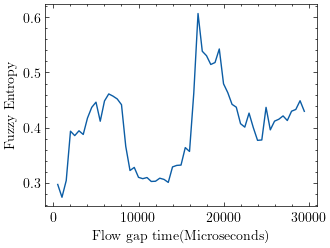

In [73]:
y = []
for td in x:
    flow_sizes = flows[td]['size'].values
    s2 = len(flow_sizes)//2
    flow_sizes = flow_sizes[s2:s2+10000]
    # flow_sizes = (flow_sizes - np.mean(flow_sizes)) / np.std(flow_sizes)
    app_en = EH.FuzzEn(flow_sizes, m=10)[0][-1]
    y.append(app_en)
plt.xlabel('Flow gap time(Microseconds)')
plt.ylabel('Fuzzy Entropy')
plt.plot(x, y)
plt.show()

In [15]:
import pandas as pd
import numpy as np
for p in paths:
    c = 1
    
    fig = plt.figure(figsize=(140, 120))
    for t in times:
        flows = pd.read_csv(f"{p}/{t}/flows.csv")['size'].values
        hist, bin_edges = np.histogram(flows, bins=200)
        cdf = np.cumsum(hist)
        cdf = cdf / cdf.max()
        ax = plt.subplot(4, 10, c)
        ax.set_title(f'{t}')
        ax.set_xlabel('flow size')
        ax.set_ylabel('density')
        plt.plot(bin_edges[:-1], cdf)   
        c+=1
    fig.suptitle(f'{p}', verticalalignment='bottom', fontsize=64)
    plt.show()

In [16]:
results = json.load(open('ts_result.json'))
times = sorted(list(map(int, results['full'].keys())))
scores = {}
for k in results:
    r = results[k]
    scores[k] = {}
    for metric in ["test_mse", 'r2', 'train_mse', "mape"]:
        scores[k][metric] = []
        for t in times:
            scores[k][metric].append(r[str(t)][metric])

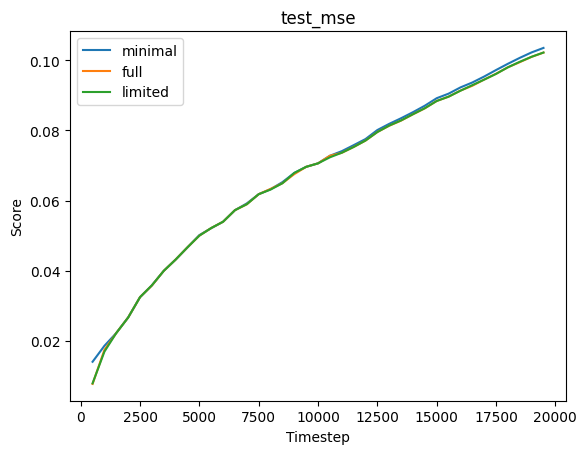

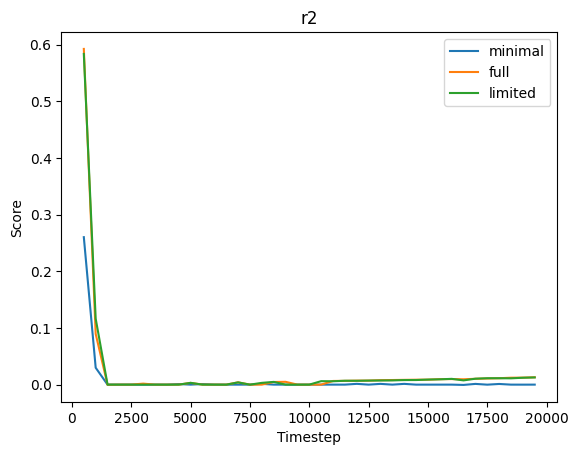

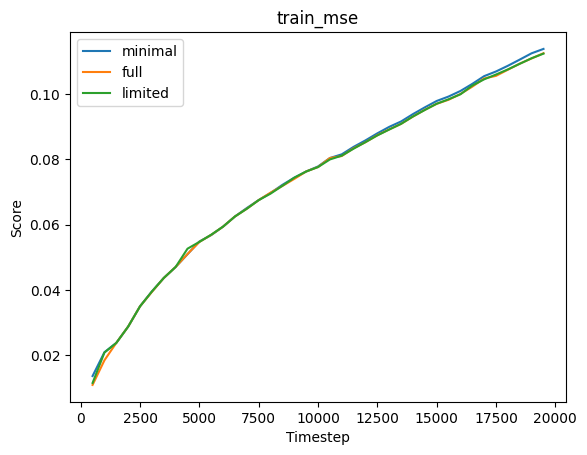

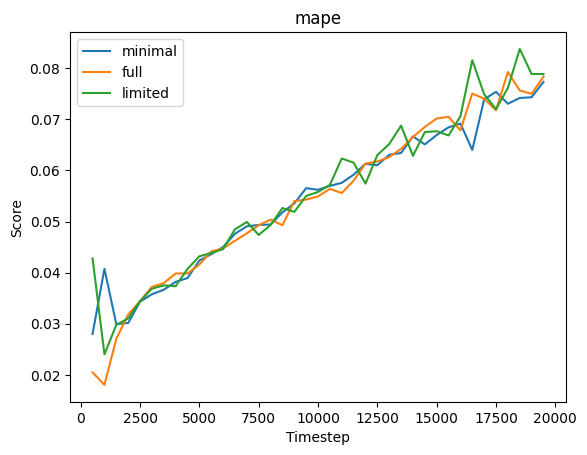

In [17]:
for metric in ["test_mse", 'r2', 'train_mse', "mape"]:
    for k in scores:
        plt.title(metric)
        plt.xlabel("Timestep")
        plt.ylabel("Score")
        t1 = times
        v1 = scores[k][metric]
        plt.plot(t1, v1, label=k)
    plt.legend()
    plt.show()

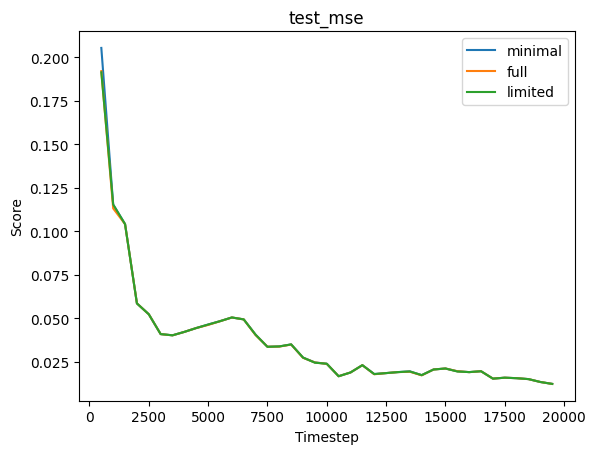

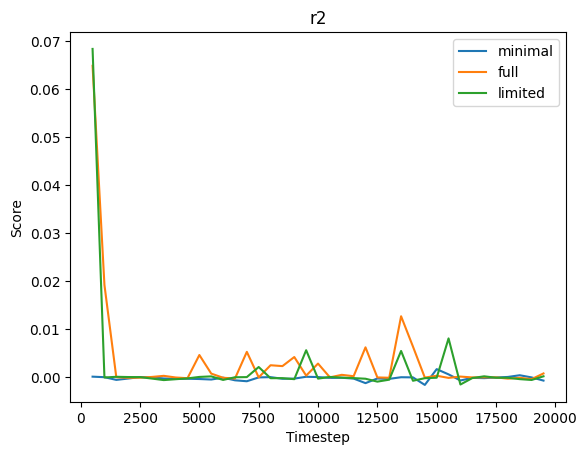

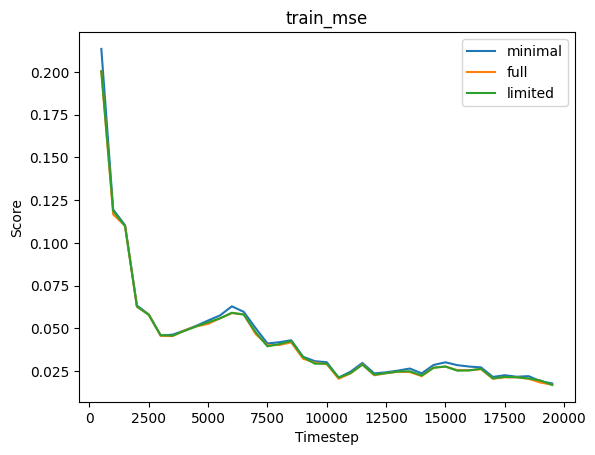

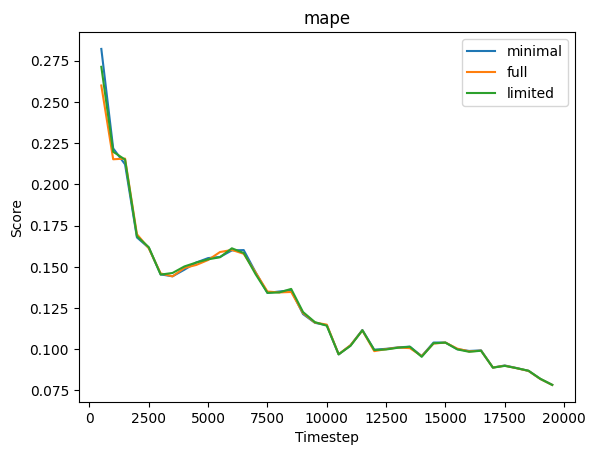

In [13]:
for metric in ["test_mse", 'r2', 'train_mse', "mape"]:
    for k in scores:
        plt.title(metric)
        plt.xlabel("Timestep")
        plt.ylabel("Score")
        t2 = times
        v2 = scores[k][metric]
        plt.plot(t2, v2, label=k)
    plt.legend()
    plt.show()

In [9]:
r = json.load(open("tr.json"))

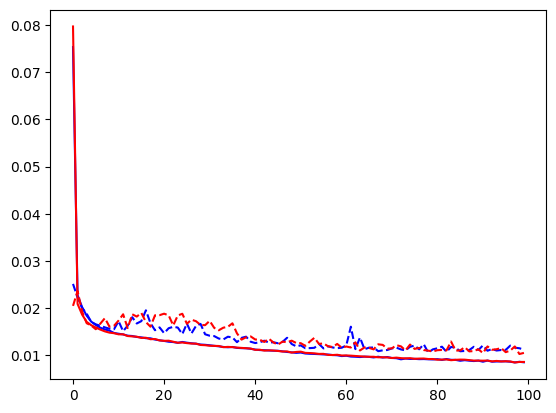

In [17]:
plt.plot(r['full']['st'], r['full']['tr'], 'b')
plt.plot(r['full']['st'], r['full']['te'], 'b--')
plt.plot(r['full']['st'], r['limited']['tr'], 'r')
plt.plot(r['full']['st'], r['limited']['te'], 'r--')